In [61]:
import pandas as pd

In [62]:
listings=pd.read_csv("/kaggle/input/indias-airbnb-gems-2024-trending-picks/Airbnb_India_Top_500.csv")

In [63]:
listings.head()

,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN
2,"Goa, India",False,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75


In [64]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              500 non-null    object 
 1   isHostedBySuperhost  500 non-null    bool   
 2   location/lat         500 non-null    float64
 3   location/lng         500 non-null    float64
 4   name                 500 non-null    object 
 5   numberOfGuests       500 non-null    int64  
 6   pricing/rate/amount  500 non-null    int64  
 7   roomType             500 non-null    object 
 8   stars                196 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 31.9+ KB


In [65]:
listings.isnull().sum()  #Sorting the null value

address                  0
isHostedBySuperhost      0
location/lat             0
location/lng             0
name                     0
numberOfGuests           0
pricing/rate/amount      0
roomType                 0
stars                  304
dtype: int64

In [66]:
#Sum of guests in the room
total_guests = listings['numberOfGuests'].sum()
print("Total Number of Guests in Top 500 AirBnB are ",total_guests)

Total Number of Guests in Top 500 AirBnB are  5780


In [67]:
#to obtain total number of Address
total_address = listings['address'].nunique()
print("Total Number of address are :", total_address)

Total Number of address are : 217


In [68]:
#Address have to be splitted to Address,State and Country for better Analysis
split_address = listings['address'].str.split(', ', expand=True)
listings['Locality'] = split_address[0]
listings['State'] = split_address[1]
listings['Country'] = split_address[2]

#removal of address column
listings.drop('address', axis=1, inplace=True)

In [69]:
listings.head()

,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars,Locality,State,Country
0,False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN,Manali,Himachal Pradesh,India
1,False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN,Manali,Himachal Pradesh,India
2,False,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00,Goa,India,None
3,False,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN,Bhuntar,Himachal Pradesh,India
4,False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75,Jaipur,Rajasthan,India


In [70]:
#Renaming Columns
listings.rename(columns={'isHostedBySuperhost':'Superhost','pricing/rate/amount':'price','location/lat':'Latitude','location/lng':'Longitude','name':'Name','numberOfGuests':'Guest Count','pricing/rate/amount':'Price','roomType':'Room Type','stars':'Ratings'}, inplace=True)
listings.head(0)

,Superhost,Latitude,Longitude,Name,Guest Count,Price,Room Type,Ratings,Locality,State,Country


In [71]:
#Need to rearrage the data frame
listings=listings[['Name', 'Locality', 'State', 'Country', 'Latitude', 'Longitude', 'Room Type', 'Guest Count','Price', 'Ratings']]

In [72]:
listings.head()

,Name,Locality,State,Country,Latitude,Longitude,Room Type,Guest Count,Price,Ratings
0,HighQ Manali / Deluxe Room,Manali,Himachal Pradesh,India,32.22330,77.18228,Room in hotel,3,8946,NaN
1,Highq manali / 3 BHK Cottage,Manali,Himachal Pradesh,India,32.22352,77.18152,Room in hotel,9,9124,NaN
2,Best view of the river from your terrace 04,Goa,India,None,15.50400,73.86600,Private room in home,4,9900,4.00
3,Shabashe,Bhuntar,Himachal Pradesh,India,31.88656,77.14467,Shared room in rental unit,1,8684,NaN
4,Luxurious Independent Studio with Wifi & Kitchen,Jaipur,Rajasthan,India,26.85991,75.66909,Entire condo,1,20690,4.75


In [73]:
#Obtaining names excluding repeated ones
norepeat_name = listings['Name'].nunique()
print("Total exclusive Names:", norepeat_name)

Total exclusive Names: 499


In [74]:
#Total Room Types
room_types = listings['Room Type'].nunique()
print("Total exclusive Room types:", room_types)

Total exclusive Room types: 40


In [75]:
#Tabulating room types
import pandas as pd
from tabulate import tabulate
roomtype_counts = listings['Room Type'].value_counts()
roomtype_counts_listings = pd.DataFrame({'Room Type': roomtype_counts.index, 'Number': roomtype_counts.values})
print(tabulate(roomtype_counts_listings, headers='keys', tablefmt='psql'))

+----+-----------------------------------+----------+
|    | Room Type                         |   Number |
|----+-----------------------------------+----------|
|  0 | Entire villa                      |      220 |
|  1 | Farm stay                         |       58 |
|  2 | Entire home                       |       49 |
|  3 | Entire bungalow                   |       29 |
|  4 | Room in hotel                     |       19 |
|  5 | Private room in resort            |       13 |
|  6 | Room in boutique hotel            |       12 |
|  7 | Private room in villa             |       11 |
|  8 | Private room in bed and breakfast |        9 |
|  9 | Entire condo                      |        8 |
| 10 | Entire cottage                    |        7 |
| 11 | Entire rental unit                |        7 |
| 12 | Houseboat                         |        6 |
| 13 | Entire chalet                     |        5 |
| 14 | Entire serviced apartment         |        4 |
| 15 | Room in heritage hote

In [76]:
#Total Number of stays per city
import pandas as pd
from tabulate import tabulate
citywise_counts = listings['Locality'].value_counts()
citywise_counts_listings = pd.DataFrame({'Locality': citywise_counts.index,'Count': citywise_counts.values})
print(tabulate(citywise_counts_listings, headers='keys', tablefmt='psql'))

+-----+----------------------+---------+
|     | Locality             |   Count |
|-----+----------------------+---------|
|   0 | Candolim             |      25 |
|   1 | New Delhi            |      22 |
|   2 | Lonavla              |      16 |
|   3 | Anjuna               |      15 |
|   4 | Jaipur               |      14 |
|   5 | Calangute            |      14 |
|   6 | Lonavala             |      13 |
|   7 | Gurugram             |      11 |
|   8 | Udaipur              |      11 |
|   9 | Goa                  |      10 |
|  10 | Assagao              |       9 |
|  11 | Vagator              |       9 |
|  12 | Manali               |       8 |
|  13 | Mumbai               |       8 |
|  14 | North Goa            |       8 |
|  15 | Alappuzha            |       8 |
|  16 | Chennai              |       7 |
|  17 | Alibag               |       7 |
|  18 | Sangolda             |       6 |
|  19 | Baga                 |       6 |
|  20 | Nerul                |       6 |
|  21 | Dehradun

In [77]:
#Total Number of stays per state
import pandas as pd
from tabulate import tabulate
statewise_counts = listings['State'].value_counts()
statewise_counts_listings = pd.DataFrame({'State': statewise_counts.index,'Count': statewise_counts.values})
print(tabulate(statewise_counts_listings, headers='keys', tablefmt='psql'))

+----+-----------------------------+---------+
|    | State                       |   Count |
|----+-----------------------------+---------|
|  0 | Goa                         |     151 |
|  1 | Maharashtra                 |      95 |
|  2 | Rajasthan                   |      38 |
|  3 | Uttarakhand                 |      32 |
|  4 | Himachal Pradesh            |      24 |
|  5 | Kerala                      |      24 |
|  6 | Delhi                       |      22 |
|  7 | India                       |      22 |
|  8 | Tamil Nadu                  |      20 |
|  9 | Haryana                     |      14 |
| 10 | Karnataka                   |      13 |
| 11 | Uttar Pradesh               |       4 |
| 12 | Andhra Pradesh              |       3 |
| 13 | Punjab                      |       3 |
| 14 | Gujarat                     |       3 |
| 15 | MH                          |       3 |
| 16 | GA                          |       2 |
| 17 | North Goa                   |       2 |
| 18 | TN    

In [78]:
listings['State'] = listings['State'].replace(['Chennai','TN'], 'Tamil Nadu')
listings['State'] = listings['State'].replace(['Kodagu','Karle','KA','कर्नाटक'], 'Karnataka')
listings['State'] =listings['State'].replace(['goa','GA','Bardez','Bardez North Goa','North Goa','Calangute'], 'Goa')
listings['State'] =listings['State'].replace(['महाराष्ट्र','MH'], 'Maharashtra')
listings['State'] = listings['State'].replace({'HP': 'Himachal Pradesh','HR':'Haryana', 'Uttrakhand':'Uttarakhand','Nasirabad': 'Rajasthan'})

In [79]:
#Let us formulate the table again
import pandas as pd
from tabulate import tabulate
statewise_counts = listings['State'].value_counts()
statewise_counts_listings = pd.DataFrame({'State': statewise_counts.index,'Count': statewise_counts.values})
print(tabulate(statewise_counts_listings, headers='keys', tablefmt='psql'))

+----+-----------------------------+---------+
|    | State                       |   Count |
|----+-----------------------------+---------|
|  0 | Goa                         |     159 |
|  1 | Maharashtra                 |      99 |
|  2 | Rajasthan                   |      38 |
|  3 | Uttarakhand                 |      33 |
|  4 | Himachal Pradesh            |      25 |
|  5 | Kerala                      |      24 |
|  6 | Tamil Nadu                  |      23 |
|  7 | Delhi                       |      22 |
|  8 | India                       |      22 |
|  9 | Karnataka                   |      17 |
| 10 | Haryana                     |      15 |
| 11 | Uttar Pradesh               |       4 |
| 12 | Gujarat                     |       3 |
| 13 | Punjab                      |       3 |
| 14 | Andhra Pradesh              |       3 |
| 15 | West Bengal                 |       2 |
| 16 | Madhya Pradesh              |       2 |
| 17 | Nasirabad                   |       1 |
| 18 | Bihar 

In [80]:
#Need to resolve the issue of Nasirabad on the above table

In [81]:
listings['State'] = listings['State'].replace({'Nasirabad ': 'Rajasthan'})

In [82]:
#Let us formulate the table again
import pandas as pd
from tabulate import tabulate
statewise_counts = listings['State'].value_counts()
statewise_counts_listings = pd.DataFrame({'State': statewise_counts.index,'Count': statewise_counts.values})
print(tabulate(statewise_counts_listings, headers='keys', tablefmt='psql'))

#there is a blank space after Nasirabad in the data

+----+-----------------------------+---------+
|    | State                       |   Count |
|----+-----------------------------+---------|
|  0 | Goa                         |     159 |
|  1 | Maharashtra                 |      99 |
|  2 | Rajasthan                   |      39 |
|  3 | Uttarakhand                 |      33 |
|  4 | Himachal Pradesh            |      25 |
|  5 | Kerala                      |      24 |
|  6 | Tamil Nadu                  |      23 |
|  7 | Delhi                       |      22 |
|  8 | India                       |      22 |
|  9 | Karnataka                   |      17 |
| 10 | Haryana                     |      15 |
| 11 | Uttar Pradesh               |       4 |
| 12 | Punjab                      |       3 |
| 13 | Andhra Pradesh              |       3 |
| 14 | Gujarat                     |       3 |
| 15 | Madhya Pradesh              |       2 |
| 16 | West Bengal                 |       2 |
| 17 | Andaman and Nicobar Islands |       1 |
| 18 | Bihar 

In [83]:
#There is India in the above state list which needs to be filtered out.We need to segregate such rows from the table and analyse the data for any leads
from tabulate import tabulate
indiarow = listings[listings['State'] == 'India']
segr_row = indiarow.values.tolist()
print(tabulate(segr_row, headers=listings.columns))

Name                                                Locality              State    Country      Latitude    Longitude  Room Type                            Guest Count    Price    Ratings
--------------------------------------------------  --------------------  -------  ---------  ----------  -----------  ---------------------------------  -------------  -------  ---------
Best view of the river from your terrace 04         Goa                   India                 15.504        73.866   Private room in home                           4     9900       4
Pahalgham Cottage Next to the River                 Aru                   India                 34.0909       75.2641  Entire cottage                                10      782     nan
Escape to Paradise, Your Group Getaway 12-36 Pax    Goa                   India                 15.535        73.767   Entire villa                                  16      978       5
Private Room  For LONG STAY  with attached bath,    Delhi            

In [84]:
#Locality got misplaced with the state name and state name got misplaced with country name

In [85]:
listings.loc[listings['State'] == 'India', 'State'] = listings.loc[listings['State'] == 'India', 'Locality']

In [86]:
#Let us formulate the table again
import pandas as pd
from tabulate import tabulate
statewise_counts = listings['State'].value_counts()
statewise_counts_listings = pd.DataFrame({'State': statewise_counts.index,'Count': statewise_counts.values})
print(tabulate(statewise_counts_listings, headers='keys', tablefmt='psql'))

+----+-----------------------------+---------+
|    | State                       |   Count |
|----+-----------------------------+---------|
|  0 | Goa                         |     169 |
|  1 | Maharashtra                 |      99 |
|  2 | Rajasthan                   |      39 |
|  3 | Uttarakhand                 |      34 |
|  4 | Himachal Pradesh            |      25 |
|  5 | Kerala                      |      25 |
|  6 | Delhi                       |      23 |
|  7 | Tamil Nadu                  |      23 |
|  8 | Karnataka                   |      17 |
|  9 | Haryana                     |      16 |
| 10 | Uttar Pradesh               |       4 |
| 11 | Punjab                      |       3 |
| 12 | Andhra Pradesh              |       3 |
| 13 | Gujarat                     |       3 |
| 14 | Madhya Pradesh              |       2 |
| 15 | West Bengal                 |       2 |
| 16 | Puducherry                  |       2 |
| 17 | Aru                         |       1 |
| 18 | Varca 

In [87]:
#There needs to be more data cleansing after exclusion of India

In [88]:
listings['State'] =listings['State'].replace(['Dodamarg Maharashtra','Mahagaon'], 'Maharashtra')
listings['State'] = listings['State'].replace({'Alappuzha': 'Kerala','Chuchot Yakma':'Ladakh','Nasirabad': 'Rajasthan','Varca':'Goa','Aru':'Jammu and Kashmir'})

In [89]:
#Let us formulate the table again after replacing Alapuzha,Varca,Aru etc
import pandas as pd
from tabulate import tabulate
statewise_counts = listings['State'].value_counts()
statewise_counts_listings = pd.DataFrame({'State': statewise_counts.index,'Count': statewise_counts.values})
print(tabulate(statewise_counts_listings, headers='keys', tablefmt='psql'))

+----+-----------------------------+---------+
|    | State                       |   Count |
|----+-----------------------------+---------|
|  0 | Goa                         |     170 |
|  1 | Maharashtra                 |     101 |
|  2 | Rajasthan                   |      39 |
|  3 | Uttarakhand                 |      34 |
|  4 | Kerala                      |      26 |
|  5 | Himachal Pradesh            |      25 |
|  6 | Tamil Nadu                  |      23 |
|  7 | Delhi                       |      23 |
|  8 | Karnataka                   |      17 |
|  9 | Haryana                     |      16 |
| 10 | Uttar Pradesh               |       4 |
| 11 | Gujarat                     |       3 |
| 12 | Punjab                      |       3 |
| 13 | Andhra Pradesh              |       3 |
| 14 | West Bengal                 |       2 |
| 15 | Puducherry                  |       2 |
| 16 | Madhya Pradesh              |       2 |
| 17 | Jammu and Kashmir           |       2 |
| 18 | Bihar 

In [90]:
#Listing out null value rows
null_rows = listings[listings['Country'].isna() | listings['Country'].eq('')]

In [91]:
null_state=listings[listings['State'].isna() | listings['State'].eq('')]

In [92]:
listings.fillna({'Ratings':'0'}, inplace=True)

In [93]:
listings.loc[listings['Country'].isna(), 'Country'] = 'India'

In [94]:
listings.fillna({'stars':'0'}, inplace=True)

In [95]:
listings.isnull().sum()  #Sorting the null value

Name           0
Locality       0
State          1
Country        0
Latitude       0
Longitude      0
Room Type      0
Guest Count    0
Price          0
Ratings        0
dtype: int64

In [96]:
listings.head()

,Name,Locality,State,Country,Latitude,Longitude,Room Type,Guest Count,Price,Ratings
0,HighQ Manali / Deluxe Room,Manali,Himachal Pradesh,India,32.22330,77.18228,Room in hotel,3,8946,0
1,Highq manali / 3 BHK Cottage,Manali,Himachal Pradesh,India,32.22352,77.18152,Room in hotel,9,9124,0
2,Best view of the river from your terrace 04,Goa,Goa,India,15.50400,73.86600,Private room in home,4,9900,4.0
3,Shabashe,Bhuntar,Himachal Pradesh,India,31.88656,77.14467,Shared room in rental unit,1,8684,0
4,Luxurious Independent Studio with Wifi & Kitchen,Jaipur,Rajasthan,India,26.85991,75.66909,Entire condo,1,20690,4.75


In [97]:
listings.head() #rectified

,Name,Locality,State,Country,Latitude,Longitude,Room Type,Guest Count,Price,Ratings
0,HighQ Manali / Deluxe Room,Manali,Himachal Pradesh,India,32.22330,77.18228,Room in hotel,3,8946,0
1,Highq manali / 3 BHK Cottage,Manali,Himachal Pradesh,India,32.22352,77.18152,Room in hotel,9,9124,0
2,Best view of the river from your terrace 04,Goa,Goa,India,15.50400,73.86600,Private room in home,4,9900,4.0
3,Shabashe,Bhuntar,Himachal Pradesh,India,31.88656,77.14467,Shared room in rental unit,1,8684,0
4,Luxurious Independent Studio with Wifi & Kitchen,Jaipur,Rajasthan,India,26.85991,75.66909,Entire condo,1,20690,4.75


In [98]:
listings.isnull().sum()  #Sorting the null value

Name           0
Locality       0
State          1
Country        0
Latitude       0
Longitude      0
Room Type      0
Guest Count    0
Price          0
Ratings        0
dtype: int64

In [99]:
null_state=listings[listings['State'].isna() | listings['State'].eq('')]

In [100]:
null_state

,Name,Locality,State,Country,Latitude,Longitude,Room Type,Guest Count,Price,Ratings
101,Eternia Villa | Exclusive Pool | Modernised | ...,India,None,India,15.50182,73.81186,Entire villa,14,3007,0


In [101]:
#based on google search it is located in locality of Reis Magos in state of Goa

In [102]:
listings.fillna({'State':'Goa'}, inplace=True)

In [103]:
listings.loc[listings['Locality'] == 'India', 'Locality'] = 'Goa'

In [104]:
null_state

,Name,Locality,State,Country,Latitude,Longitude,Room Type,Guest Count,Price,Ratings
101,Eternia Villa | Exclusive Pool | Modernised | ...,India,None,India,15.50182,73.81186,Entire villa,14,3007,0


In [105]:
listings.isnull().sum()  #Sorting the null value

Name           0
Locality       0
State          0
Country        0
Latitude       0
Longitude      0
Room Type      0
Guest Count    0
Price          0
Ratings        0
dtype: int64

In [106]:
#null value is completely removed from the data frame

In [107]:
#CLEANSED DATA
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [108]:
#downloading final data
listings.to_csv('final_data.csv', index=False)

from IPython.display import FileLink
FileLink('final_data.csv')

/kaggle/working/final_data.csv

In [109]:
#DATA ANALYSIS USING PYTHON

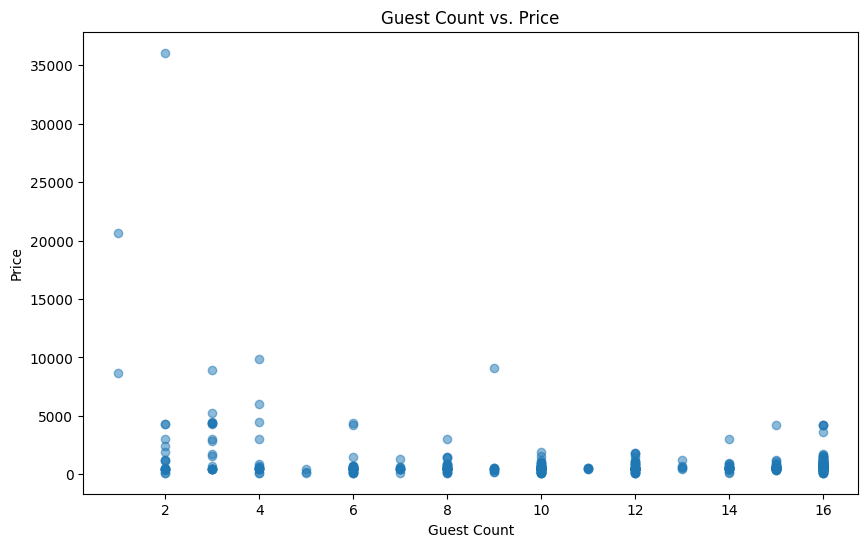

In [110]:
#PLOTTING NUMBER OF GUESTS VS PRICE
plt.figure(figsize=(10, 6))
plt.scatter(listings['Guest Count'], listings['Price'], alpha=0.5)
plt.title('Guest Count vs. Price')
plt.xlabel('Guest Count')
plt.ylabel('Price')
plt.show()

In [111]:
#State wise Analysis

In [112]:
statewise_counts

State
Goa                            170
Maharashtra                    101
Rajasthan                       39
Uttarakhand                     34
Kerala                          26
Himachal Pradesh                25
Tamil Nadu                      23
Delhi                           23
Karnataka                       17
Haryana                         16
Uttar Pradesh                    4
Gujarat                          3
Punjab                           3
Andhra Pradesh                   3
West Bengal                      2
Puducherry                       2
Madhya Pradesh                   2
Jammu and Kashmir                2
Bihar                            1
Andaman and Nicobar Islands      1
Ladakh                           1
Telangana                        1
Name: count, dtype: int64

In [113]:
state_graph= pd.DataFrame({'states': statewise_counts.index, 'counts': statewise_counts.values})
states = list(state_graph['states'])
counts = list(state_graph['counts'])




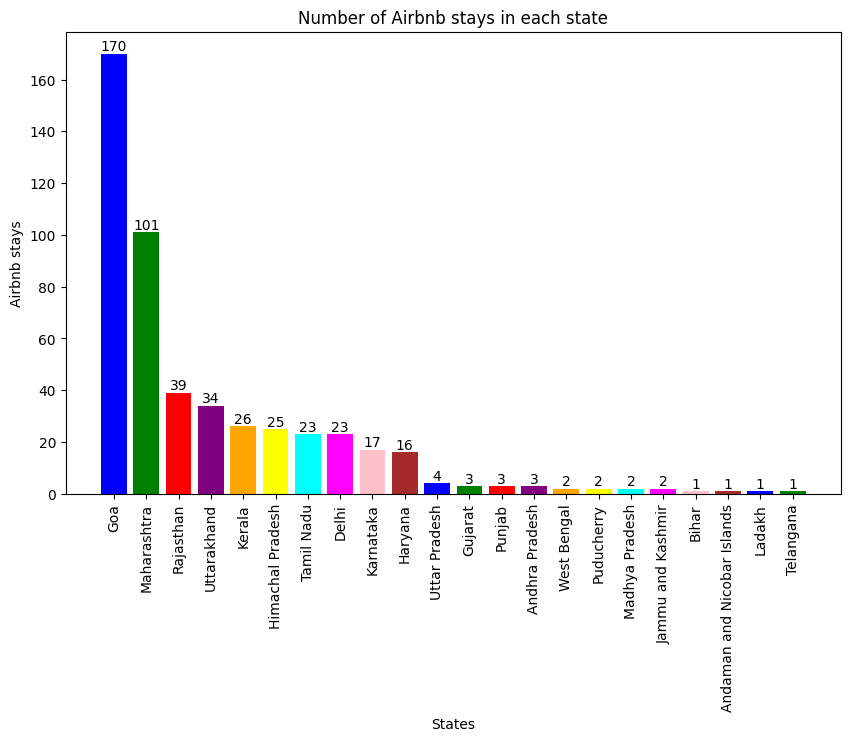

In [114]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'pink', 'brown']
plt.figure(figsize=(10, 6))
bars=plt.bar(states, counts,color=colors)
plt.title('Number of Airbnb stays in each state')
plt.xlabel('States')
plt.ylabel('Airbnb stays')
plt.xticks(rotation=90)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')
plt.show()

In [115]:
listings['Ratings'] = pd.to_numeric(listings['Ratings'], errors='coerce')
avg_rating_state = listings[listings['Ratings'] != 0].groupby('State')['Ratings'].mean()

In [116]:
avg_rating_state

State
Delhi               4.760000
Goa                 4.668736
Gujarat             4.620000
Haryana             4.565000
Himachal Pradesh    4.796000
Karnataka           4.587143
Kerala              4.717143
Maharashtra         4.588158
Punjab              4.500000
Rajasthan           4.578000
Tamil Nadu          4.762727
Telangana           5.000000
Uttar Pradesh       4.785000
Uttarakhand         4.660909
West Bengal         4.435000
Name: Ratings, dtype: float64

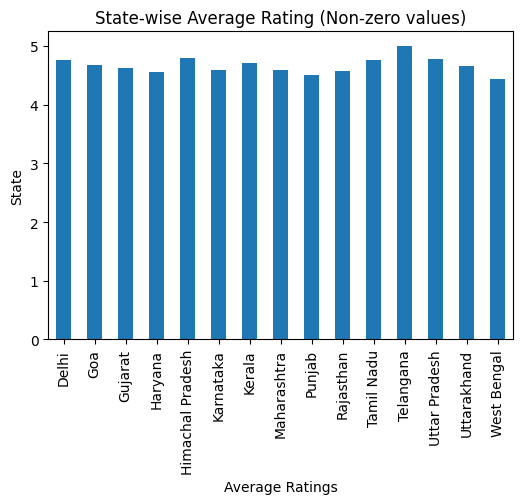

In [117]:
avg_rating_state.plot(kind='bar', figsize=(6, 4))
plt.xlabel('Average Ratings')
plt.ylabel('State')
plt.title('State-wise Average Rating (Non-zero values)')
plt.show()

In [118]:
filtered_listing = listings.groupby('State').filter(lambda x: x['Price'].count() >= 4)
pricing_state = filtered_listing.groupby('State')['Price'].mean()
pricing_state

State
Delhi               1374.565217
Goa                  715.181287
Haryana              653.062500
Himachal Pradesh    2277.840000
Karnataka            677.176471
Kerala               539.538462
Maharashtra          634.950495
Rajasthan           1238.461538
Tamil Nadu           487.478261
Uttar Pradesh        485.000000
Uttarakhand          812.235294
Name: Price, dtype: float64

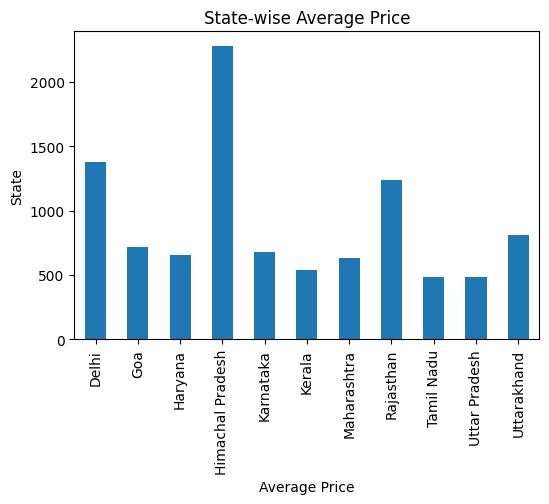

In [119]:
pricing_state.plot(kind='bar', figsize=(6, 4))

plt.xlabel('Average Price')
plt.ylabel('State')
plt.title('State-wise Average Price')
plt.show()


In [120]:
import folium
from folium.plugins import HeatMap
map_india = folium.Map(location=[20.5937, 78.9629], zoom_start=5, scrollWheelZoom=False)
heat_data = listings[['Latitude', 'Longitude', 'Price']].values.tolist()
HeatMap(heat_data, radius=10).add_to(map_india)
map_india.fit_bounds([[6.5, 68.1], [35.7, 97.4]])

map_india